In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [9]:
for dataset in combine:
   
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms','Countess','Mme','Lady'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt','Major','Col','Sir','Don','Jonkheer','Rev'], 'Mr')

In [10]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Miss,0.697802
3,Mr,0.158192
4,Mrs,0.801527


In [11]:
title_mapping = {"Dr": 1, "Mr": 2, "Mrs": 3,"Master":4,"Miss":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


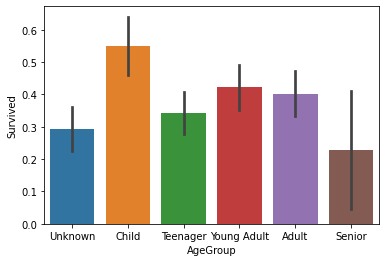

In [12]:
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 16, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

#Draw a bar plot of Age vs. survival

sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.show()

In [13]:
age_mapping = {'Unknown': 0,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        891 non-null    int64   
 13  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB


In [14]:
leaves=[10,16,30,35,40,49,55,50]

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "AgeGroup","Fare","Embarked","Title"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

print(X.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Title       891 non-null    int64  
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   AgeGroup_0  891 non-null    uint8  
 8   AgeGroup_1  891 non-null    uint8  
 9   AgeGroup_2  891 non-null    uint8  
 10  AgeGroup_3  891 non-null    uint8  
 11  AgeGroup_4  891 non-null    uint8  
 12  AgeGroup_5  891 non-null    uint8  
 13  Embarked_C  891 non-null    uint8  
 14  Embarked_Q  891 non-null    uint8  
 15  Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(11)
memory usage: 44.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (tota

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [16]:
na_list=X.isna().sum() + X_test.isna().sum()
print(na_list)

num_cols=[col for col in X if X[col].dtype in ['int64','float64']  and na_list[col]>0]
cat_cols=[col for col in X_test if X[col].dtype in ['object']]

print(" Numerical Columns ",num_cols,"\n Categorical Columns",cat_cols)

Pclass        0
SibSp         0
Parch         0
Fare          1
Title         0
Sex_female    0
Sex_male      0
AgeGroup_0    0
AgeGroup_1    0
AgeGroup_2    0
AgeGroup_3    0
AgeGroup_4    0
AgeGroup_5    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64
 Numerical Columns  ['Fare'] 
 Categorical Columns []


In [17]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=21)

benchmark_model=XGBClassifier(random_state=21)

pip_b=Pipeline(steps=[("benchmark_model",benchmark_model)])

pip_b.fit(X_train,y_train)
pred=pip_b.predict(X_valid)

acc=accuracy_score(y_valid,pred)
print(acc)

0.820627802690583


In [18]:
import xgboost as xgb
from lightgbm import LGBMClassifier as lgb
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier as lgb

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(0,500,50),
    'max_depth': range(3,7),
    'learning_rate': [0.05,0.1,0.15,0.2,0.25],
    'subsample':[0.8,0.9,1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'n_jobs':[4]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(random_state=21)

#Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 10, cv = 6,n_jobs=4)


#Fit randomized_mse to the data
xgb_random.fit(X, y)

#Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

#print("Results of the Execution\n\n\n")
#print("Fitting 6 folds for each of 1000 candidates, totalling 6000 fits\n[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.\n[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.1s\n[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min\n[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.3min\n[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.9min\n[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  9.2min\n[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 13.1min\n[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 17.6min\n[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 23.2min\n[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 29.3min\n[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 37.1min\n\nBest parameters found:  {'subsample': 0.9, 'n_jobs': 4, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.5, 'colsample_bytree': 0.8}\nBest accuracy found:  0.8428562790978898\n\n[Parallel(n_jobs=4)]: Done 6000 out of 6000 | elapsed: 44.5min finished ")


Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   25.7s finished


Best parameters found:  {'subsample': 0.8, 'n_jobs': 4, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best accuracy found:  0.8361599854888445


In [19]:
lgb_param_grid = {
    'n_estimators': range(0,500,50),
    'max_depth': range(3,7),
    'learning_rate': [0.05,0.1,0.15,0.2,0.25],
    'subsample':[0.8,0.9,1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'n_jobs':[4]
}

lgb_model = lgb(random_state=21)

lgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                   estimator = lgb_model, scoring = "accuracy", 
                                  verbose = 1, n_iter = 10, cv = 6,n_jobs=4)

lgb_random.fit(X, y)

print("Best parameters found: ", lgb_random.best_params_)
print("Best accuracy found: ", lgb_random.best_score_)

#print("Results of the Execution\n\n\n")

#print("Fitting 6 folds for each of 1000 candidates, totalling 6000 fits\n\n[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.\n[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.1s\n[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.7min\n[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.7min\n[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.6min\n[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 12.1min\n[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 16.9min\n[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 22.8min\n[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 31.4min\n[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 39.5min\n[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 47.6min\n[Parallel(n_jobs=4)]: Done 6000 out of 6000 | elapsed: 58.0min finished\n\nBest parameters found:  {'subsample': 1, 'n_jobs': 4, 'n_estimators': 25, 'max_depth': 5, 'learning_rate': 0.4, 'colsample_bytree': 0.9}\nBest accuracy found:  0.8361751012757725")

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   31.7s finished


Best parameters found:  {'subsample': 1, 'n_jobs': 4, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best accuracy found:  0.8339077332365923


In [20]:
#Implementing Best Model
from lightgbm import LGBMClassifier as lgb
model=XGBClassifier(n_estimators=250,max_depth= 6,subsample=0.8,colsample_bytree=0.6,learning_rate=0.05,n_jobs=4,random_state=21)

pip = Pipeline(steps=[('model',model)])
pip.fit(X, y)
predic = pip.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predic})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
